# Exploratory Data Analysis (EDA)

1. [Introduction](#introduction)
2. [Data Loading & Preprocessing](#data-loading--preprocessing)
3. [Exploratory Data Analysis (EDA)](#exploratory-data-analysis-eda)
   - [Descriptive Statistics](#descriptive-statistics)
4. [Moving Averages](#moving-averages)
5. [Volume Analysis](#volume-analysis)
6. [Daily Returnss](#daily-returns)
7. [Correlation Analysis](#correlation-analysis)
8. [Volatility Analysis](#volatility-analysis)

# 1.Introduction 
The dataset provided contains historical stock prices for multiple Canadian banks, including BMO, RBC, and others, over a span of several years (2020-2024). It includes key columns such as stock_ticker, date, close_price, high_price, low_price, open_price, and volume. Exploratory Data Analysis (EDA) on this dataset will help us uncover trends, identify patterns, and examine relationships between stock prices and trading volumes, enabling deeper insights into the behavior and performance of these stocks. The goal is to understand the dynamics of the market and prepare for predictive modeling and investment analysis.

### Purpose of the analysis:
- Calculate moving averages for bank stocks
- Identify correlations between stock returns
- Assess stock volatility
- Analyze trading volume trends


# 2. Data Loading and Preprocessing

In [4]:
# load data
df = pd.read_csv('stock_prices.csv')
df

,st_pr_id,stock_ticker,date,close_price,high_price,low_price,open_price,volume
0,1,BMO.TO,2020-01-03,80.279427,80.335287,79.593141,79.880423,1473000
1,2,BMO.TO,2020-01-06,80.215599,80.239544,79.856499,79.888420,1147500
2,3,BMO.TO,2020-01-07,80.079941,80.622585,80.048020,80.239546,702000
3,4,BMO.TO,2020-01-08,80.662498,81.101398,80.199653,80.215611,1088400
4,5,BMO.TO,2020-01-09,80.957748,81.213110,80.702387,80.997651,1683900
...,...,...,...,...,...,...,...,...
6268,6269,RY.TO,2024-12-23,173.449997,173.869995,172.610001,173.000000,3932200
6269,6270,RY.TO,2024-12-24,173.529999,173.740005,173.050003,173.529999,610300
6270,6271,RY.TO,2024-12-27,174.360001,174.500000,173.440002,173.440002,1846800
6271,6272,RY.TO,2024-12-30,173.059998,173.589996,172.289993,173.000000,3103600


In [7]:
# Display basic info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6273 entries, 0 to 6272
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   st_pr_id      6273 non-null   int64  
 1   stock_ticker  6273 non-null   object 
 2   date          6273 non-null   object 
 3   close_price   6273 non-null   float64
 4   high_price    6273 non-null   float64
 5   low_price     6273 non-null   float64
 6   open_price    6273 non-null   float64
 7   volume        6273 non-null   int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 392.2+ KB
None


In [8]:
df.head()

,st_pr_id,stock_ticker,date,close_price,high_price,low_price,open_price,volume
0,1,BMO.TO,2020-01-03,80.279427,80.335287,79.593141,79.880423,1473000
1,2,BMO.TO,2020-01-06,80.215599,80.239544,79.856499,79.888420,1147500
2,3,BMO.TO,2020-01-07,80.079941,80.622585,80.048020,80.239546,702000
3,4,BMO.TO,2020-01-08,80.662498,81.101398,80.199653,80.215611,1088400
4,5,BMO.TO,2020-01-09,80.957748,81.213110,80.702387,80.997651,1683900


In [9]:
# Drop Unnecessary Columns
df.drop(columns=["st_pr_id"], inplace=True)
df

,stock_ticker,date,close_price,high_price,low_price,open_price,volume
0,BMO.TO,2020-01-03,80.279427,80.335287,79.593141,79.880423,1473000
1,BMO.TO,2020-01-06,80.215599,80.239544,79.856499,79.888420,1147500
2,BMO.TO,2020-01-07,80.079941,80.622585,80.048020,80.239546,702000
3,BMO.TO,2020-01-08,80.662498,81.101398,80.199653,80.215611,1088400
4,BMO.TO,2020-01-09,80.957748,81.213110,80.702387,80.997651,1683900
...,...,...,...,...,...,...,...
6268,RY.TO,2024-12-23,173.449997,173.869995,172.610001,173.000000,3932200
6269,RY.TO,2024-12-24,173.529999,173.740005,173.050003,173.529999,610300
6270,RY.TO,2024-12-27,174.360001,174.500000,173.440002,173.440002,1846800
6271,RY.TO,2024-12-30,173.059998,173.589996,172.289993,173.000000,3103600


In [10]:
# Convert Date Column to DateTime Format
df["date"] = pd.to_datetime(df["date"])
print(df.dtypes)

stock_ticker            object
date            datetime64[ns]
close_price            float64
high_price             float64
low_price              float64
open_price             float64
volume                   int64
dtype: object


In [11]:
#Check for Missing Values
print(df.isnull().sum())

stock_ticker    0
date            0
close_price     0
high_price      0
low_price       0
open_price      0
volume          0
dtype: int64


# 3. EDA
## 3.1. Descriptive Statistics
.describe() generates descriptive statistics. Descriptive statistics include those that summarize the central tendency, dispersion, and shape of a dataset’s distribution, excluding NaN values.

In [12]:
df.describe()

,date,close_price,high_price,low_price,open_price,volume
count,6273,6273.000000,6273.000000,6273.000000,6273.000000,6.273000e+03
mean,2022-07-01 15:24:25.136298240,80.389468,80.931078,79.811136,80.359042,4.175782e+06
min,2020-01-02 00:00:00,25.911804,28.073357,25.877310,27.440987,2.157000e+05
25%,2021-04-01 00:00:00,56.463879,56.818015,56.027343,56.456757,2.257200e+06
50%,2022-06-30 00:00:00,73.648445,74.145484,73.155671,73.643317,3.363200e+06
75%,2023-10-02 00:00:00,109.846405,110.574856,109.124842,109.903316,5.103700e+06
max,2024-12-31 00:00:00,179.570007,180.449997,178.440002,179.940002,2.883860e+07
std,NaN,30.385350,30.516353,30.213970,30.346333,2.939800e+06


# 4. Moving Averages

Moving averages are crucial in stock data analysis because they help smooth out short-term fluctuations and highlight longer-term trends. By calculating the average of stock prices over a specific period, moving averages reduce noise and provide clearer insights into price movements. The Simple Moving Average (SMA) gives an equal weight to all data points within the window, while the Exponential Moving Average (EMA) emphasizes more recent prices, making it more responsive to recent price changes. Both types of moving averages are valuable tools for identifying trends, entry/exit points, and potential support or resistance levels.

A **Simple Moving Average (SMA)** smooths price data by calculating the average over a specific window.

An **Exponential Moving Average (EMA)** gives more weight to recent prices.

In [13]:
# Define moving average windows
sma_windows = [50, 100, 500]

# Calculate SMA for each window
for window in sma_windows:
    df[f"SMA_{window}"] = df.groupby("stock_ticker")["close_price"].transform(lambda x: x.rolling(window).mean())

# Display sample data
df.head(30)


,stock_ticker,date,close_price,high_price,low_price,open_price,volume,SMA_50,SMA_100,SMA_500
0,BMO.TO,2020-01-03,80.279427,80.335287,79.593141,79.880423,1473000,NaN,NaN,NaN
1,BMO.TO,2020-01-06,80.215599,80.239544,79.856499,79.888420,1147500,NaN,NaN,NaN
2,BMO.TO,2020-01-07,80.079941,80.622585,80.048020,80.239546,702000,NaN,NaN,NaN
3,BMO.TO,2020-01-08,80.662498,81.101398,80.199653,80.215611,1088400,NaN,NaN,NaN
4,BMO.TO,2020-01-09,80.957748,81.213110,80.702387,80.997651,1683900,NaN,NaN,NaN
5,BMO.TO,2020-01-10,80.933800,81.053502,80.566718,80.909861,1243400,NaN,NaN,NaN
6,BMO.TO,2020-01-13,81.556236,81.556236,80.702370,80.933792,4100400,NaN,NaN,NaN
7,BMO.TO,2020-01-14,81.963219,82.019079,81.396635,81.564216,1923500,NaN,NaN,NaN
8,BMO.TO,2020-01-15,82.202637,82.330315,81.907372,81.915354,1729600,NaN,NaN,NaN
9,BMO.TO,2020-01-16,82.481926,82.585665,82.202625,82.338285,1809800,NaN,NaN,NaN


The NaN values appear because the Simple Moving Average (SMA) requires enough data points to calculate the rolling mean. Here’s why:

A 10-day SMA needs at least 10 days of data before it produces a value.
A 50-day SMA needs 50 days, and so on.
Since the first few rows don’t have enough past data points, they show NaN.

In [14]:
# Calculate EMA for each window
for window in sma_windows:
    df[f"EMA_{window}"] = df.groupby("stock_ticker")["close_price"].transform(lambda x: x.ewm(span=window, adjust=False).mean())

df.head(30)


,stock_ticker,date,close_price,high_price,low_price,open_price,volume,SMA_50,SMA_100,SMA_500,EMA_50,EMA_100,EMA_500
0,BMO.TO,2020-01-03,80.279427,80.335287,79.593141,79.880423,1473000,NaN,NaN,NaN,80.279427,80.279427,80.279427
1,BMO.TO,2020-01-06,80.215599,80.239544,79.856499,79.888420,1147500,NaN,NaN,NaN,80.276924,80.278163,80.279172
2,BMO.TO,2020-01-07,80.079941,80.622585,80.048020,80.239546,702000,NaN,NaN,NaN,80.269199,80.274237,80.278376
3,BMO.TO,2020-01-08,80.662498,81.101398,80.199653,80.215611,1088400,NaN,NaN,NaN,80.284622,80.281926,80.279910
4,BMO.TO,2020-01-09,80.957748,81.213110,80.702387,80.997651,1683900,NaN,NaN,NaN,80.311019,80.295308,80.282616
5,BMO.TO,2020-01-10,80.933800,81.053502,80.566718,80.909861,1243400,NaN,NaN,NaN,80.335442,80.307952,80.285215
6,BMO.TO,2020-01-13,81.556236,81.556236,80.702370,80.933792,4100400,NaN,NaN,NaN,80.383316,80.332670,80.290289
7,BMO.TO,2020-01-14,81.963219,82.019079,81.396635,81.564216,1923500,NaN,NaN,NaN,80.445273,80.364958,80.296968
8,BMO.TO,2020-01-15,82.202637,82.330315,81.907372,81.915354,1729600,NaN,NaN,NaN,80.514190,80.401348,80.304575
9,BMO.TO,2020-01-16,82.481926,82.585665,82.202625,82.338285,1809800,NaN,NaN,NaN,80.591356,80.442548,80.313267


#### Plot Moving Averages

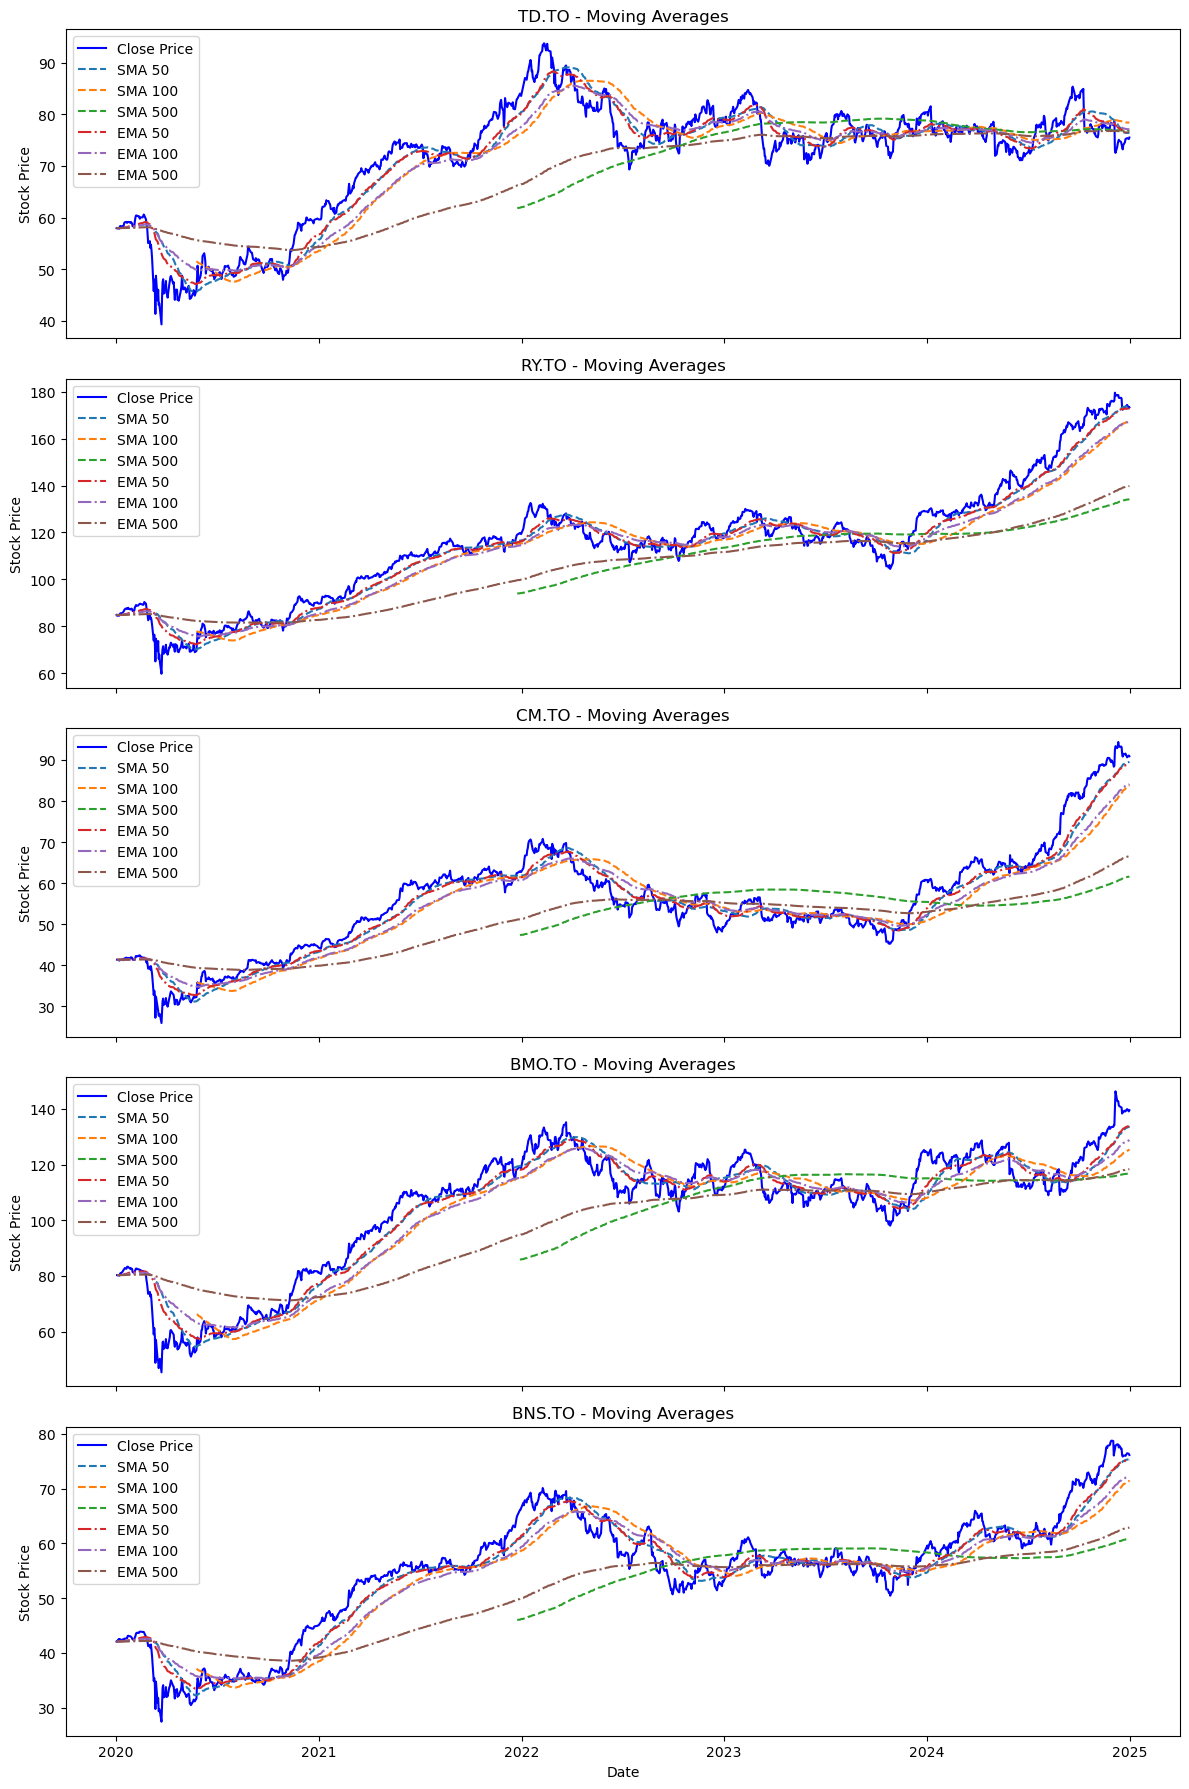

In [15]:
import matplotlib.pyplot as plt

# Define bank tickers
bank_tickers = ["TD.TO", "RY.TO", "CM.TO", "BMO.TO", "BNS.TO"]
sma_windows = [50, 100, 500]  # Different SMA periods
ema_windows = [50, 100, 500]  # Different EMA periods

# Create subplots (5 rows, 1 column)
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(12, 18), sharex=True)

# Loop through banks and plot on separate axes
for i, stock in enumerate(bank_tickers):
    stock_data = df[df["stock_ticker"] == stock]
    
    axes[i].plot(stock_data["date"], stock_data["close_price"], label="Close Price", color="blue")
    
    # Plot multiple SMA and EMA lines
    for window in sma_windows:
        axes[i].plot(stock_data["date"], stock_data[f"SMA_{window}"], label=f"SMA {window}", linestyle="--")

    for window in ema_windows:
        axes[i].plot(stock_data["date"], stock_data[f"EMA_{window}"], label=f"EMA {window}", linestyle="-.")

    axes[i].set_title(f"{stock} - Moving Averages")
    axes[i].set_ylabel("Stock Price")
    axes[i].legend()

axes[-1].set_xlabel("Date")  # Add x-label only to the last subplot
plt.tight_layout()
plt.show()


This visualization compares the moving averages of five major Canadian banks (TD.TO, RY.TO, CM.TO, BMO.TO, and BNS.TO) over the past few years. The chart includes Simple Moving Averages (SMA) and Exponential Moving Averages (EMA) with different time windows (10, 50, 100, and 200 days).

**Key Observations:**
General Market Trends:

- All five banks show long-term upward trends, indicating growth over time.
- The stock prices exhibit periods of volatility, with occasional downturns followed by recoveries.
- Short-term SMAs (10, 50 days) are more sensitive to price movements, while long-term SMAs (100, 200 days) smooth out fluctuations.

**Bank-Specific Insights:**

- TD.TO (Toronto-Dominion Bank): Price movements have been relatively stable since 2022, with no sharp trends. The stock remains close to its long-term moving averages, indicating a consolidation phase.
- RY.TO (Royal Bank of Canada): Shows a strong upward trend, with prices consistently above long-term moving averages, suggesting continued growth.
- CM.TO (CIBC): The stock experienced sideways movement in earlier years but surged significantly in the latest period, with SMAs and EMAs diverging.
- BMO.TO (Bank of Montreal): Displays steady growth, but with more volatility compared to other banks. The price remains above long-term moving averages.
- BNS.TO (Scotiabank): Exhibits an upward trend, but with more pronounced fluctuations. The moving averages are well-aligned, reflecting market stability.

**Conclusion:**
RY.TO and CM.TO have the strongest upward momentum, indicating investor confidence and potential long-term growth.
TD.TO and BMO.TO are relatively stable, with price movements showing less dramatic trends.
BNS.TO shows volatility but maintains a general upward trajectory.
The long-term SMAs and EMAs confirm that Canadian banks have been growing steadily, though they experience short-term fluctuations.

# 5. Volume Analysis

### What is Volume of Sales ?  
**Volume** represents the number of shares traded within a specific time period, often within a day. It is a crucial indicator in stock market analysis that helps assess market activity and investor sentiment.  

### Why is Volume Important?  

- **Market Activity & Liquidity** – High trading volume indicates strong investor interest and ensures smoother trade execution.  
- **Price Movements Confirmation** – Significant price changes accompanied by high volume suggest strong market sentiment, while low volume may indicate weaker or temporary movements.  
- **Trend Strength** – Rising volume during an uptrend confirms buying interest, whereas declining volume may signal a potential trend reversal.  
- **Volatility Insights** – Sudden spikes in volume can indicate increased volatility, often preceding major price fluctuations.  
- **Institutional Participation** – Large volume surges may suggest institutional investors entering or exiting positions, influencing market direction.  

By analyzing trading volume alongside price movements, traders and investors can better understand market trends and make more informed investment decisions.


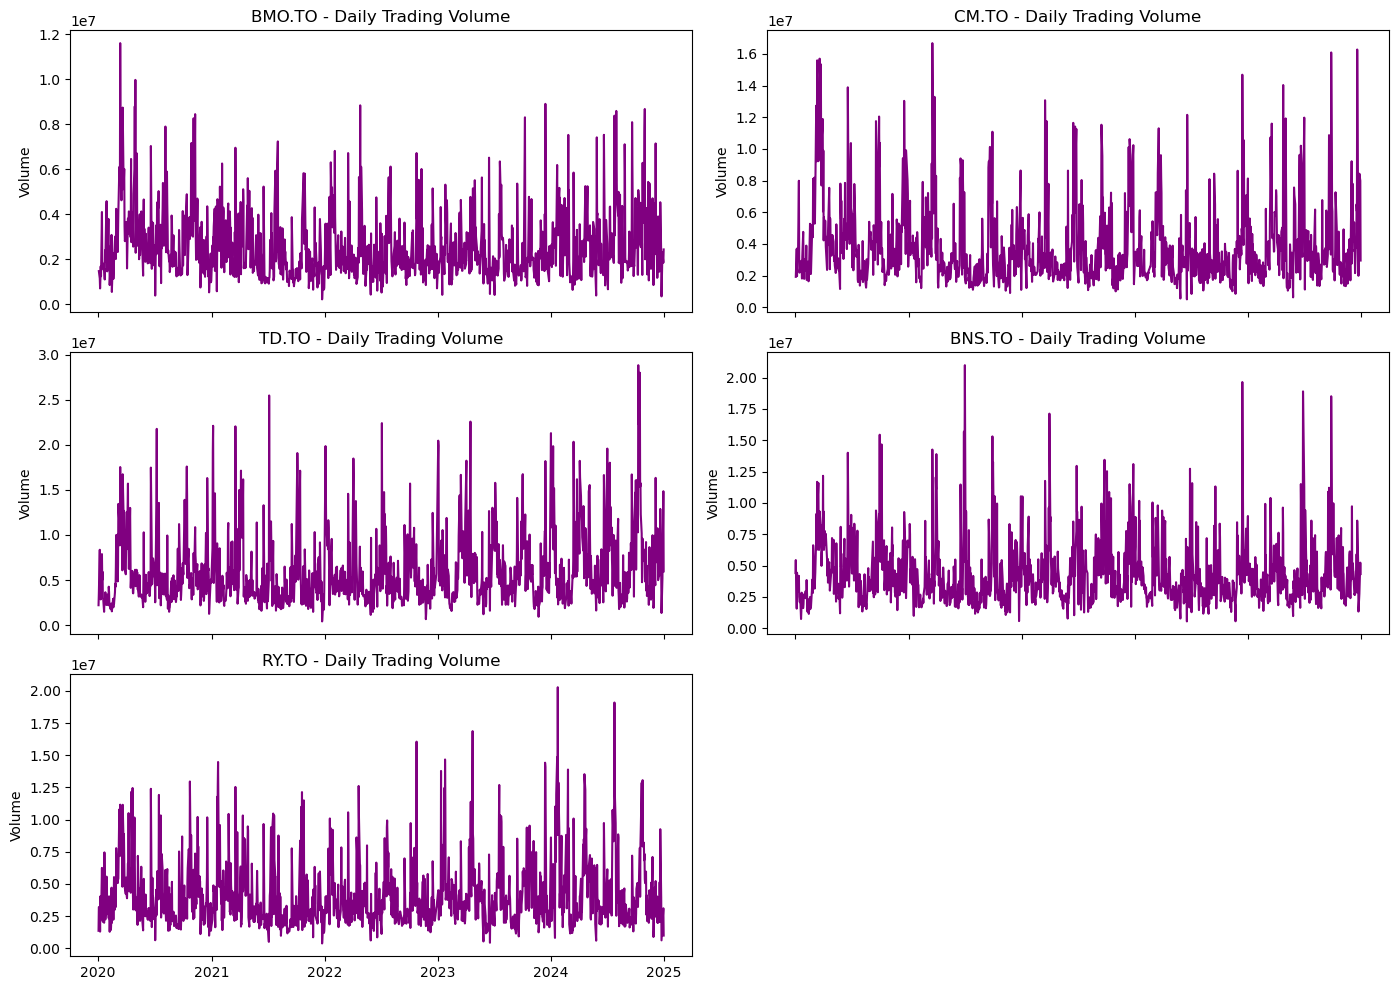

In [16]:
# Define stock tickers
bank_tickers = df["stock_ticker"].unique()

# Set up subplots in a 2-column layout
rows = int(np.ceil(len(bank_tickers) / 2))  # Calculate required rows
fig, axes = plt.subplots(rows, 2, figsize=(14, 10), sharex=True)

# Flatten axes array if needed
axes = axes.flatten()

# Loop through banks and plot trading volume
for i, stock in enumerate(bank_tickers):
    stock_data = df[df["stock_ticker"] == stock]
    axes[i].plot(stock_data["date"], stock_data["volume"], color="purple")
    axes[i].set_title(f"{stock} - Daily Trading Volume")
    axes[i].set_ylabel("Volume")

# Remove empty subplots if there are any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

axes[-1].set_xlabel("Date")  # Add x-axis label only on the last subplot
plt.tight_layout()
plt.show()

On this charts we can see daily trading volume trends over time.
Spikes in volume, which may indicate high-interest trading days.

**Insights from the Charts:**


- All stocks show high volatility in trading volume, with frequent spikes.
- The spikes likely represent significant market events, earnings reports, or macroeconomic factors affecting trading activity.

- There appear to be recurring trends each year, possibly indicating seasonal trading behavior.
- These could be linked to quarterly earnings releases or economic cycles.

- Among the stocks, TD.TO seems to experience the highest peaks, reaching above 25 million in trading volume.
- This suggests TD Bank might be the most actively traded stock in this group.

- In several stocks (e.g., RY.TO and TD.TO), trading volume appears to be increasing slightly over time.
- This could indicate growing investor interest or increased market activity.

- CM.TO and BMO.TO show similar patterns of trading volume with frequent spikes.
- BNS.TO seems to have relatively fewer extreme spikes compared to the others.

# 6. Daily Returns
Let’s dive deeper into understanding the risk of these stocks. Instead of just looking at absolute price values, we need to analyze daily returns—the percentage change in price from one day to the next.
The daily return measures the percentage change in stock price from one day to the next. It helps assess the volatility and risk of a stock.

- 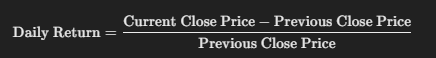


In [24]:
df["daily_return"] = df.groupby("stock_ticker")["close_price"].pct_change()

In [25]:
#Analyze the Average Daily Return
avg_daily_return = df.groupby("stock_ticker")["daily_return"].mean()
print(avg_daily_return)

stock_ticker
BMO.TO    0.000580
BNS.TO    0.000585
CM.TO     0.000749
RY.TO     0.000657
TD.TO     0.000325
Name: daily_return, dtype: float64


A histogram can help visualize the distribution of daily returns (**volatility**):
- A wider spread means higher volatility (risk).
- A narrow spread means lower volatility (stability).

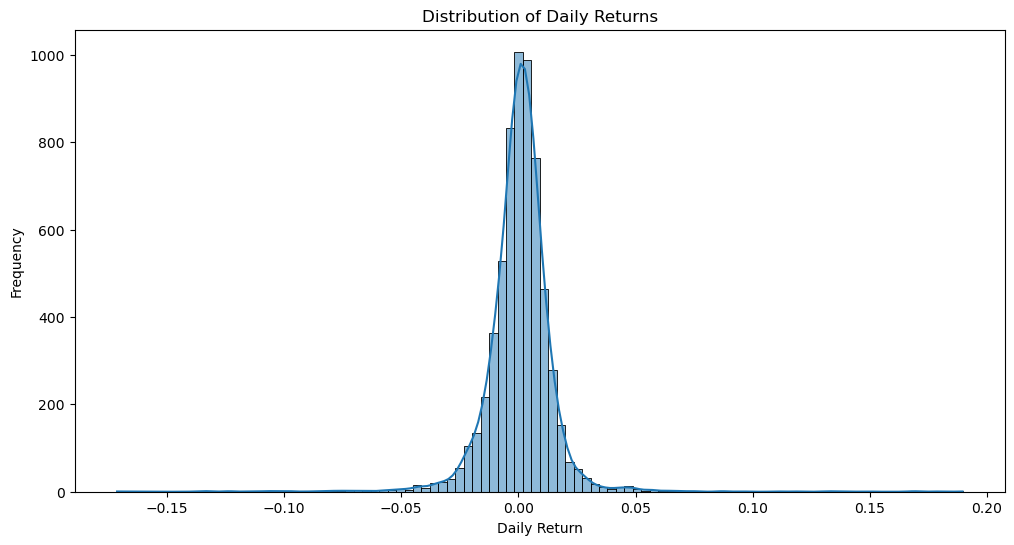

In [26]:
plt.figure(figsize=(12,6))
sns.histplot(df["daily_return"].dropna(), bins=100, kde=True)
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.title("Distribution of Daily Returns")
plt.show()

# 7. Correlation Analysis 

Correlation analysis helps us understand how stocks move **relative to each other**. It is essential in stock data analysis because:  

- **Identifies Relationships** – Reveals whether stocks move together (positive correlation) or in opposite directions (negative correlation).  
- **Diversification Strategy** – Helps investors build portfolios by selecting stocks that are less correlated to reduce risk.  
- **Market Trends & Sector Analysis** – Shows how stocks within the same industry or market react to economic events.  
- **Risk Management** – Helps assess exposure by understanding how stock price movements are interconnected.  

By analyzing the **correlation matrix of daily returns**, we can make more **informed investment decisions** and optimize portfolio performance. 


In [17]:
#  Compute Daily Returns
df["daily_return"] = df.groupby("stock_ticker")["close_price"].pct_change()

In [18]:
#Calculate Correlation Between Stock Returns

correlation_matrix = df.pivot(index="date", columns="stock_ticker", values="daily_return").corr()
print(correlation_matrix)

stock_ticker    BMO.TO    BNS.TO     CM.TO     RY.TO     TD.TO
stock_ticker                                                  
BMO.TO        1.000000  0.815929  0.828345  0.801760  0.777643
BNS.TO        0.815929  1.000000  0.814090  0.795693  0.797678
CM.TO         0.828345  0.814090  1.000000  0.805357  0.739761
RY.TO         0.801760  0.795693  0.805357  1.000000  0.782565
TD.TO         0.777643  0.797678  0.739761  0.782565  1.000000


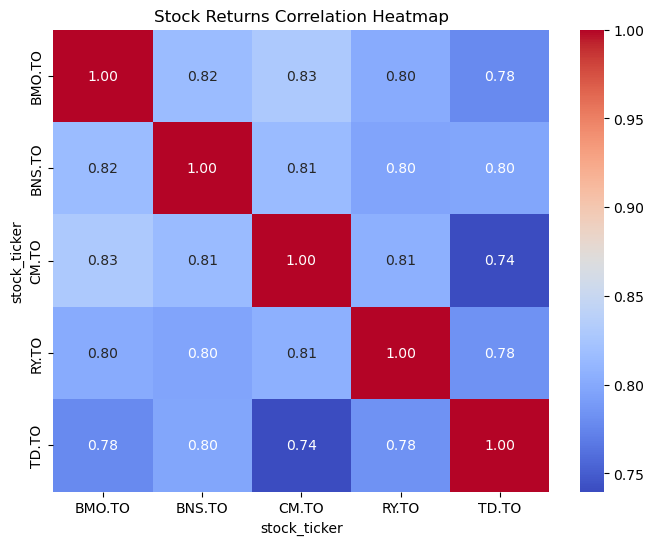

In [19]:
# Visualize Correlation with a Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Stock Returns Correlation Heatmap")
plt.show()

A correlation matrix is created to measure how the returns of these stocks move together (values range from -1 to 1).
Higher correlation (close to 1): Stocks tend to move together.
Lower correlation (closer to 0): Stocks move independently.

**Insights from the Correlation Matrix and Heatmap:**

- All banks exhibit a strong positive correlation, meaning they tend to move in the same direction.
- This is expected since they operate in the same financial sector and are influenced by similar macroeconomic factors (e.g., interest rates, inflation, banking regulations)
- CM.TO and BMO.TO (0.83) and TD.TO and CM.TO (0.83) show the highest correlations.This suggests that these banks may have similar investor sentiment and exposure to market risks.
- TD.TO has the weakest correlations (0.74 - 0.78) compared to other banks. While still positively correlated, TD Bank's stock movements are slightly more independent, possibly due to different business strategies or international exposure.

Why Does This Happen?

- Banks react similarly to economic conditions like interest rate changes, central bank policies, and market liquidity.
- Investors often trade bank stocks as a group, leading to high correlations.
- TD.TO's slightly lower correlation could be due to different geographical exposure (TD has a strong U.S. presence compared to other banks).

 ## Computing Correlation and P-Values
 
A correlation close to 1 means a strong positive relationship (prices move together).
A correlation close to -1 means a strong negative relationship.
A p-value < 0.05 suggests a statistically significant correlation.

In [21]:
from scipy.stats import pearsonr

# Drop rows with any missing values before computing correlation
df_pivot_clean = df_pivot.dropna()

# Compute correlation matrix
correlation_matrix = df_pivot_clean.corr()

# Compute p-values
p_values = pd.DataFrame(np.zeros((len(df_pivot_clean.columns), len(df_pivot_clean.columns))),
                        columns=df_pivot_clean.columns, index=df_pivot_clean.columns)

for col1 in df_pivot_clean.columns:
    for col2 in df_pivot_clean.columns:
        if col1 != col2:
            corr, p = pearsonr(df_pivot_clean[col1], df_pivot_clean[col2])
            p_values.loc[col1, col2] = p
        else:
            p_values.loc[col1, col2] = np.nan  # NaN for self-correlation

# Display results
print("Correlation Matrix:\n", correlation_matrix)
print("\nP-Values:\n", p_values)


Correlation Matrix:
 stock_ticker    BMO.TO    BNS.TO     CM.TO     RY.TO     TD.TO
stock_ticker                                                  
BMO.TO        1.000000  0.956802  0.847728  0.864577  0.947328
BNS.TO        0.956802  1.000000  0.931033  0.917282  0.898913
CM.TO         0.847728  0.931033  1.000000  0.936824  0.737581
RY.TO         0.864577  0.917282  0.936824  1.000000  0.766264
TD.TO         0.947328  0.898913  0.737581  0.766264  1.000000

P-Values:
 stock_ticker  BMO.TO  BNS.TO          CM.TO          RY.TO          TD.TO
stock_ticker                                                             
BMO.TO           NaN     0.0   0.000000e+00   0.000000e+00   0.000000e+00
BNS.TO           0.0     NaN   0.000000e+00   0.000000e+00   0.000000e+00
CM.TO            0.0     0.0            NaN   0.000000e+00  9.594817e-216
RY.TO            0.0     0.0   0.000000e+00            NaN  8.859894e-243
TD.TO            0.0     0.0  9.594817e-216  8.859894e-243            NaN


1. Correlation Matrix
The values range from -1 to 1:

1.0000 means perfect positive correlation (same stock vs. itself).
Close to 1 (e.g., 0.95, 0.93) means strong positive correlation → stocks tend to move in the same direction.
Close to 0 means weak or no correlation.
Negative values (not present here) would indicate an inverse relationship.
Observations:

BMO.TO and TD.TO have a strong correlation of 0.9473 → their stock prices tend to move together.
CM.TO and RY.TO also have a strong correlation (0.936), suggesting a similar trend.
The lowest correlation is between TD.TO and CM.TO (0.7375), meaning they are less synchronized.

2. P-Values (Statistical Significance)
Small p-values (< 0.05 or very close to 0) indicate that the correlation is statistically significant (not due to random chance).
P-values here are mostly 0 or extremely small (e.g., 8.85e-243), meaning the correlations are highly significant.

Conclusion

All the stocks are positively correlated, meaning they generally move in the same direction.
The strong correlations suggest that the Canadian banking sector stocks have similar price trends, likely influenced by economic factors affecting all banks.
The p-values confirm that these correlations are statistically significant.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


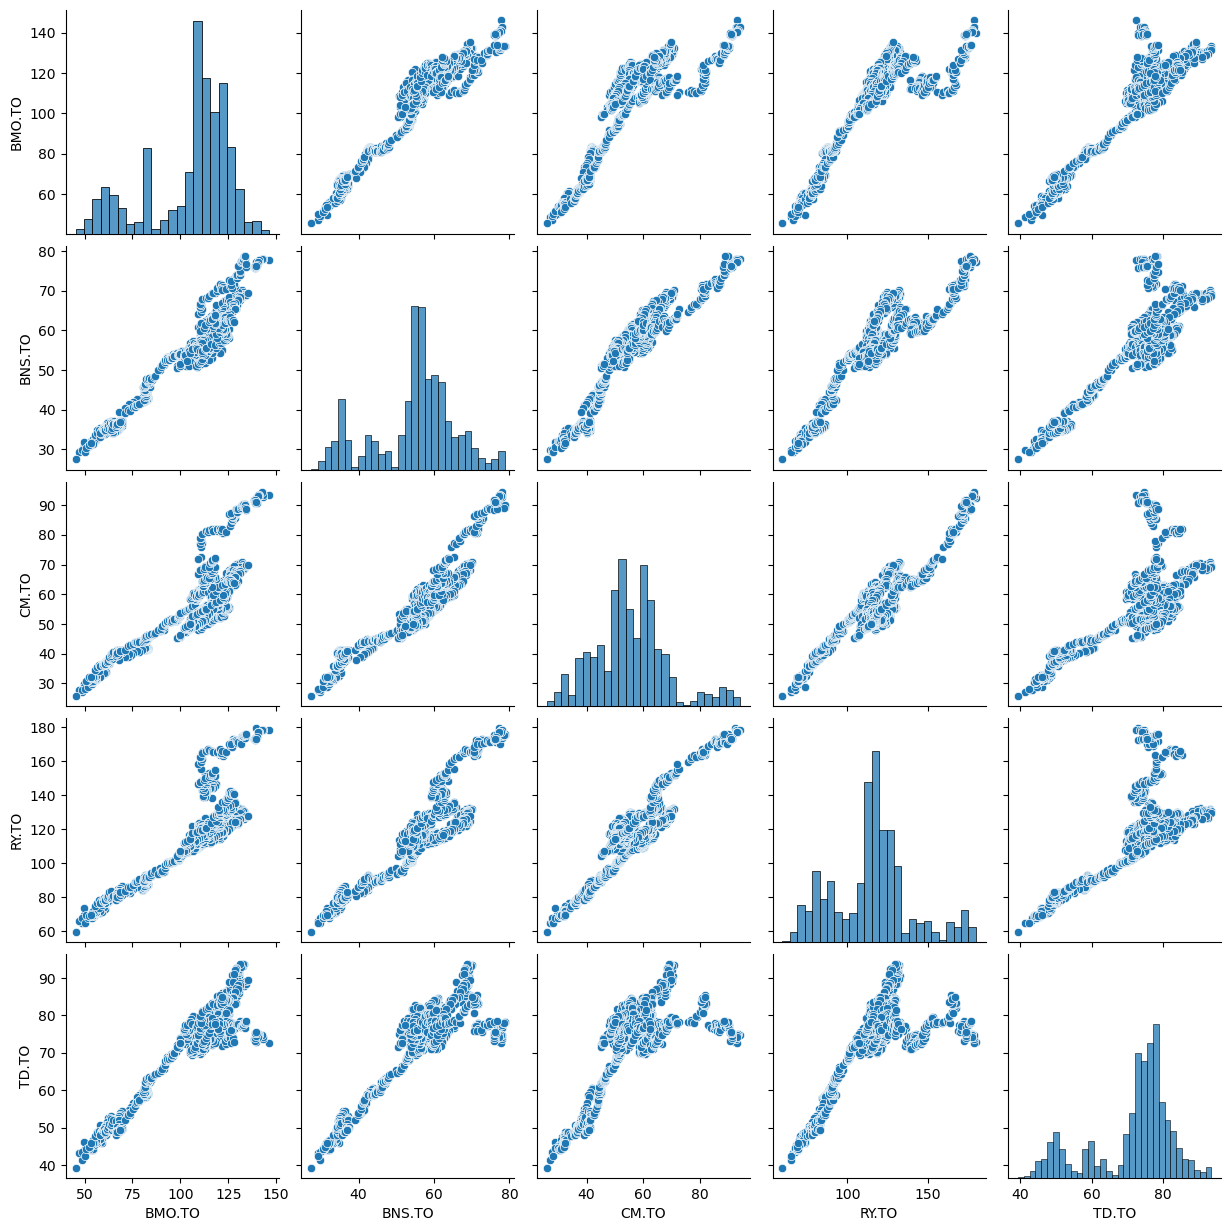

In [22]:
sns.pairplot(df_pivot)
plt.show()

**Diagonal Histograms**

The diagonal plots show the distribution of each stock’s prices.
Most distributions seem right-skewed, meaning prices are more concentrated at lower values but have a long tail toward higher prices.

**Scatterplots**

The off-diagonal plots show scatterplots comparing different stocks.
The linear patterns in most scatterplots indicate a strong positive correlation, which aligns with the high correlation values from your matrix.
Some relationships appear more tightly clustered (higher correlation), while others have a bit more spread.

**Takeaways:**

Stocks from different banks move in a similar pattern, confirming a strong positive correlation.
The distributions show price trends, which might indicate which stocks are more volatile or stable.

# 8. Volatility Analysis

**Stock volatility** measures how much a stock's price fluctuates over time. It is typically calculated using the **standard deviation of daily returns**, as shown in our analysis.  

### Why is volatility important?  
- **Risk Assessment** – Higher volatility means greater price swings, which can indicate higher risk.  
- **Investment Strategy** – Helps investors decide between stable (low-volatility) or high-risk, high-reward stocks.  
- **Market Behavior** – Understanding volatility helps in identifying market trends and reactions to economic events.  

In our analysis, we compared the volatility of major **Canadian bank stocks** to determine which ones experience the most fluctuations. This insight is valuable for making informed investment decisions and managing portfolio risk.  

In [30]:
# Compare Volatility Across Banks This tells which bank's stock is the most volatile.

volatility = df.groupby("stock_ticker")["daily_return"].std()
# Display volatility values
print(volatility)

stock_ticker
BMO.TO    0.016582
BNS.TO    0.014967
CM.TO     0.015427
RY.TO     0.013178
TD.TO     0.015149
Name: daily_return, dtype: float64


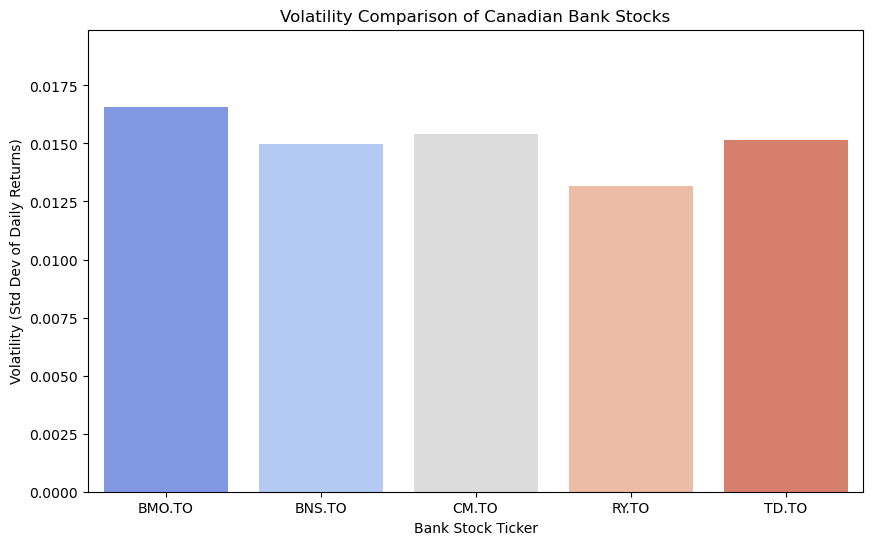

In [31]:
plt.figure(figsize=(10,6))
sns.barplot(x=volatility.index, y=volatility.values, palette="coolwarm")

# Labels and title
plt.xlabel("Bank Stock Ticker")
plt.ylabel("Volatility (Std Dev of Daily Returns)")
plt.title("Volatility Comparison of Canadian Bank Stocks")
plt.ylim(0, max(volatility.values) * 1.2)  # Adjust y-axis for better visibility

plt.show()

The bar chart compares the standard deviation of daily returns for each bank, representing their volatility.

BMO.TO and TD.TO exhibit the highest volatility, suggesting they experience larger fluctuations in stock prices.

RY.TO has the lowest volatility, indicating more price stability.

BNS.TO and CM.TO have moderate volatility levels.

**Insights:**
    
- Higher volatility (BMO.TO, TD.TO) may indicate higher risk but also greater potential returns.
- Lower volatility (RY.TO) suggests a more stable stock, which could be preferred by conservative investors.
- Investors should consider volatility alongside other financial indicators before making decisions.